# Exercise 5


1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom
2. Create a new Jupyter notebook
3. Load the dataset from CSV into pandas
4. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?
5. The data is entirely categorical. Convert each feature to dummy variables.
6. Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.

Your submission should be your Jupyter notebook, keep it short and concise.

# Downloading, loading data into jupyter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("agaricus-lepiota (1).data")
df.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Exploring the distribtion between ediblilty and habitats in the dataset

for u: e= 96 p= 272 

for g: e= 1408 p= 740 

for l: e= 240 p= 592 

for m: e= 256 p= 36 

for w: e= 192 p= 0 

for d: e= 1880 p= 1268 

antall sopper: 6980


<function matplotlib.pyplot.show(*args, **kw)>

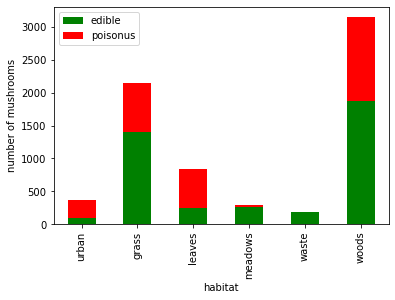

In [7]:
#habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

#method for finding how many edibles and poisonus mushroom is in each habitat
def find_edibles(name_of_habitat, row, edibal, poisonus):
    if r['habitat'] == name_of_habitat:
        if row['edibility'] == "p":
            poisonus += 1
        else:
            edibal += 1
    return (edibal, poisonus) 
    


p_in_u, e_in_u = 0,0
p_in_g, e_in_g = 0,0
p_in_l, e_in_l = 0,0
p_in_m, e_in_m = 0,0
p_in_w, e_in_w = 0,0
p_in_d, e_in_d = 0,0


for i, r in df.iterrows():
    
    e_in_u, p_in_u  =  find_edibles("u", r, e_in_u, p_in_u)
    e_in_g, p_in_g  =  find_edibles("g", r, e_in_g, p_in_g)
    e_in_l, p_in_l  =  find_edibles("l", r, e_in_l, p_in_l)
    e_in_m, p_in_m  =  find_edibles("m", r, e_in_m, p_in_m)
    e_in_w, p_in_w  =  find_edibles("w", r, e_in_w, p_in_w)
    e_in_d, p_in_d  =  find_edibles("d", r, e_in_d, p_in_d)

#printing to see the exact distribution of poisonus and edible mushrooms in each habitat    
print("for u: e=",e_in_u,"p=" ,p_in_u,"\n")
print("for g: e=",e_in_g,"p=" ,p_in_g,"\n")
print("for l: e=",e_in_l,"p=" ,p_in_l,"\n")
print("for m: e=",e_in_m,"p=" ,p_in_m,"\n")
print("for w: e=",e_in_w,"p=" ,p_in_w,"\n")
print("for d: e=",e_in_d,"p=" ,p_in_d,"\n")
print("antall sopper:", (e_in_u+p_in_u+e_in_g+p_in_g+e_in_l+p_in_l+e_in_m+p_in_m+e_in_w+p_in_w+e_in_d+p_in_d))

    

data_for_edibles = {'edible': [e_in_u, e_in_g, e_in_l, e_in_m, e_in_w, e_in_d], 'poisonus': [p_in_u, p_in_g, p_in_l, p_in_m, p_in_w, p_in_d], 'habitat': ['urban','grass','leaves','meadows','waste','woods']}
new_df = pd.DataFrame(data=data_for_edibles)
new_df.set_index('habitat', inplace=True)
new_df.plot.bar(stacked=True, color=['green','red'])
plt.ylabel('number of mushrooms')
plt.show

# Creating dummy data

In [3]:
#5. Converting from categorical to dummie variables
dummie_data = pd.get_dummies(df)
dummie_data

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


# Visualization

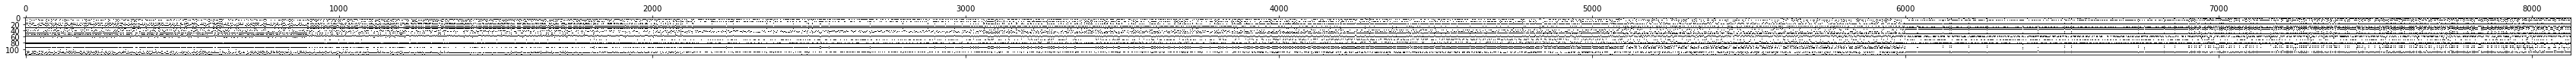

In [4]:
plt.spy(dummie_data.T, precision=0.1)
fig = plt.gcf()
fig.set_size_inches(60,60)
plt.plot()
plt.show()